**Основные цели этого задания**:
*   Научиться понижать размерность данных
*   Попрактиковаться в обучении моделей кластеризации

**Задача: по замерам акселерометра и гироскопа, произведенным с помощью телефона, находящегося на поясе, научиться отделять различные типы активностей друг от друга**

In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

*1. Загрузите данные из источника по ссылке. Нам нужен файл X_train.txt (там будет чуть более 7 тысяч наблюдений). Чтобы подгрузить этот файл, можно воспользоваться функцией loadtxt библиотеки numpy.*

In [98]:
X_train = np.loadtxt('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.5X_train.txt')

In [99]:
print("shape of data:",X_train.shape)
print("datatype of data:",X_train.dtype)

shape of data: (7352, 561)
datatype of data: float64


*2. Ознакомьтесь с данными*:
*   выведите количество признаков;
*   есть ли в данных пропуски;
*   отличаются ли различные признаки по масштабу

Можно перевести данные в DataFrame для более "красивого" отображения:

In [100]:
df = pd.DataFrame(data=X_train)

In [101]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


*   Всего значений 7352, пустые значения отсутствуют. 
*   Колонок (Признаков) 561
*   Тип данных float64
*   Размер датасета 31.5 MB

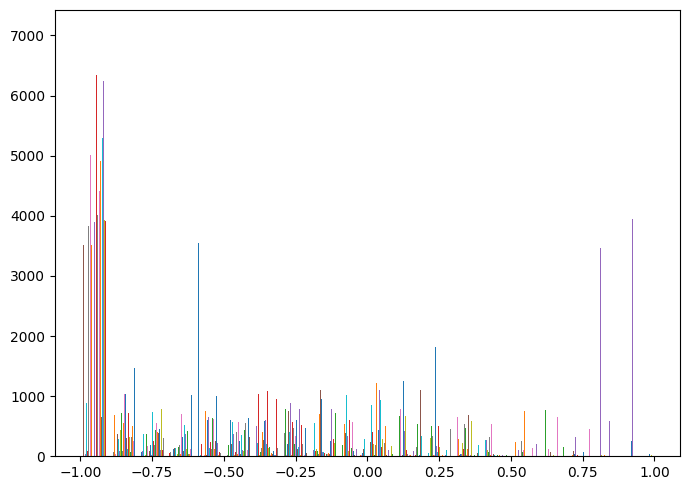

In [103]:
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 5),
                        tight_layout = True)
 
axs.hist(df, bins = 20)

plt.show()

Диаграмма не совсем "читаема", но мы видим, что все признаки по масштабу находятся в диапазоне от -1.0 до 1.0

*3. Понизьте размерность данных*:
1.   воспользуйтесь методом порога отклонения, чтобы избавиться от наблюдений, вариативность по которым низка. Удалите не более 10 % признаков;
2.   воспользуйтесь методом PCA:
    *   приведите признаки к одинаковому масштабу,
    *   визуализируйте зависимость степени объяснения дисперсии исходных данных от количества выделяемых главных компонент,
    *   определите минимальное необходимое количество главных компонент, при которых объяснение дисперсии исходных данных будет достаточно велико (хотя бы 90 %),
    *   выделите первые две главные компоненты и с помощью визуализации убедитесь, что новые признаки позволяют неплохо отделить данные друг от друга.

In [44]:
var_selector=VarianceThreshold(threshold=0.01)
df_var = var_selector.fit_transform(df)

In [45]:
print("shape of data:",df_var.shape)
print(f'Удалено признаков: {561 - 524}, что составляет {round(100 - (524 / 561 * 100) , 2)}% от общей выборки')

shape of data: (7352, 524)
Удалено признаков: 37, что составляет 6.6% от общей выборки


**PCA - Метод главных компонент**

In [47]:
features_norm = StandardScaler().fit_transform(df_var)

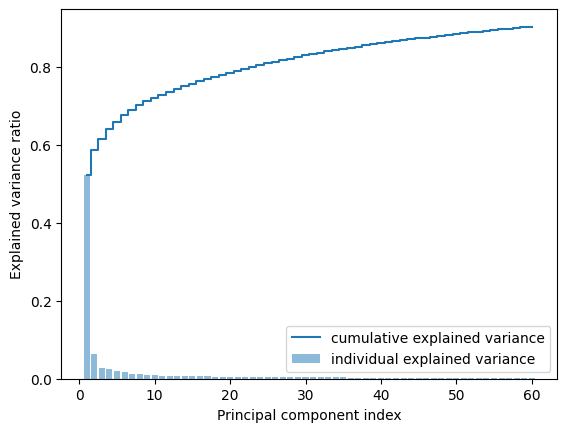

In [64]:
pca = PCA(n_components = 60)
pca.fit(features_norm)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 61), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 61), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [65]:
print(var_exp)
print(sum(var_exp))

[0.52286887 0.06462211 0.02671926 0.02561301 0.01908929 0.01702732
 0.01328388 0.01213456 0.00993911 0.00892356 0.00808884 0.00755007
 0.0073389  0.00674961 0.0063161  0.00611456 0.00598489 0.00567409
 0.00546591 0.00525412 0.00502315 0.00501129 0.00465016 0.0044601
 0.00439757 0.00421351 0.00411014 0.00408053 0.00401876 0.00373792
 0.00356688 0.00342628 0.00338516 0.003321   0.00323063 0.00306195
 0.00292505 0.00279583 0.00267731 0.00267023 0.00260503 0.00258762
 0.00252384 0.00242487 0.00240595 0.00236857 0.00229902 0.00219302
 0.00218311 0.00216296 0.00210455 0.00203909 0.00201154 0.00191442
 0.00189714 0.00186864 0.00184338 0.00178888 0.0017537  0.00169735]
0.9021941904217188


Минимальное необходимое количество главных компонент - 60. При этом объяснение дисперсии исходных данных будет 90 %

In [70]:
pca = PCA(n_components = 2)
features_reduced = pca.fit_transform(features_norm)

pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,514,515,516,517,518,519,520,521,522,523
0,0.057509,0.058187,0.055658,0.057248,0.057662,0.055207,0.057217,0.05606,0.054472,-0.057566,...,-0.005868,0.012672,0.010499,-0.001638,-0.001209,0.000939,-0.001566,-0.023796,0.030631,0.027379
1,-0.006461,-0.021852,-0.029867,-0.005061,-0.024713,-0.034020,-0.006408,-0.02253,-0.024020,0.007070,...,0.073965,-0.016744,-0.012233,-0.006055,-0.003815,0.012283,-0.009325,0.017783,-0.036061,-0.017498


In [72]:
pd.DataFrame(features_reduced).corr()

,0,1
0,1.000000e+00,-1.140645e-16
1,-1.140645e-16,1.000000e+00


Видно, что первый главный компонент отвечает за дисперсию 52,29%. А пот второй главный компонент - 6,46% . 

C:\Users\1will\AppData\Local\Temp\ipykernel_12692\3724070101.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  s=20, cmap='viridis')


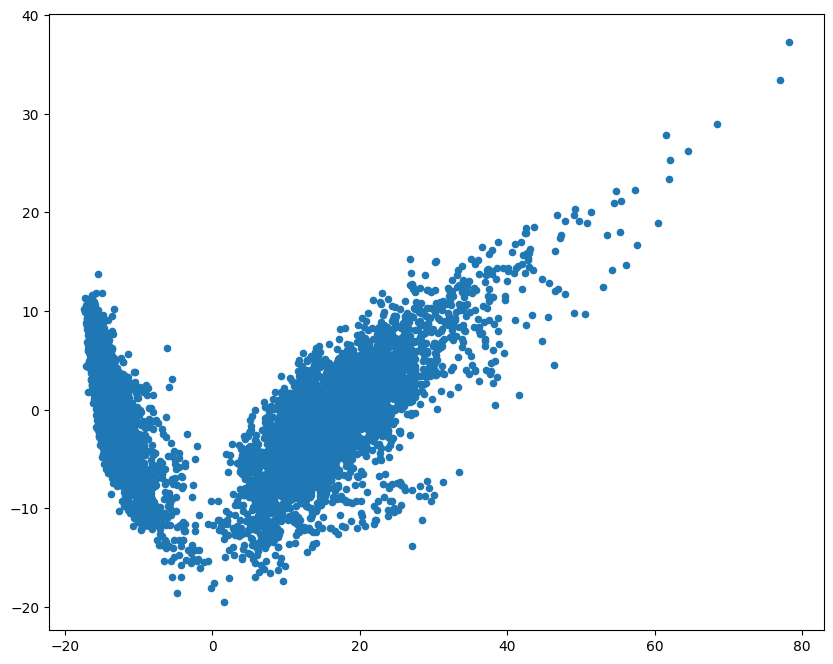

In [125]:
X_reduced = pca.fit_transform(features_reduced)

plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  s=20, cmap='viridis')

На визуализации видно, что признаки можно неплохо "отделить" друг от друга

*4. Подберите оптимальное число кластеров*:
*   воспользуйтесь методом локтя, чтобы оценить, как варьируется значение целевой функции кластеризации в зависимости от количества кластеров, на которые мы делим данные;
*   выберите оптимальное количество кластеров и объясните свой выбор;
*   повторите визуализацию данных по первым двум главным компонентам, размечая наблюдения каждого кластера своим цветом.

In [80]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=4)
    model.fit(X_train)
    distortion.append(model.inertia_) 

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\1will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 1/9 [00:00<00:04,  1.65it/s]C:\Users\1will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 22%|██▏       | 2/9 [00:01<00:05,  1.34it/s]C:\Users\1will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

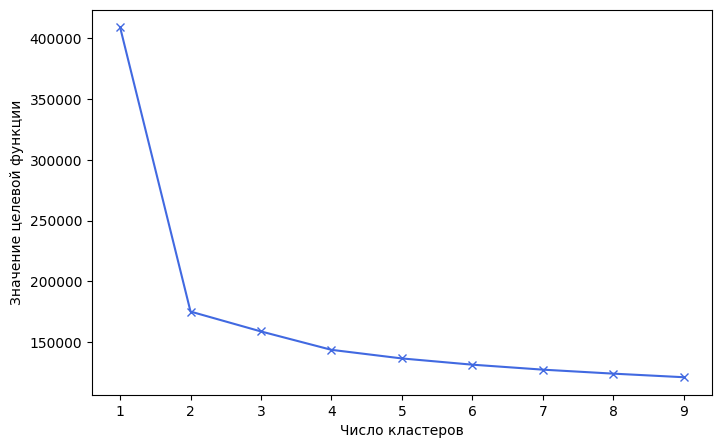

In [81]:
plt.figure(figsize=(8, 5))
plt.plot(K, distortion, c='royalblue', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

*5. Оцените качество кластеризации*:
*   подгрузите реальные метки наблюдений из файла y_train.txt, а также их значения из файла activity_labels.txt;
*   определите, насколько логична полученная кластеризация. Можно, например, сформировать сводную таблицу, где в строках будут реальные активности, а в столбцах — лейблы, полученные согласно кластеризации;
*   сделайте выводы, опишите, почему те или иные виды активности могли объединиться в один кластер, а другие отделиться от них.

In [127]:
y_train = np.loadtxt('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.5y_train.txt')